In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

In [17]:
# import the training set
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

In [18]:
# Featur Scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

training_set_scaled =sc.fit_transform(training_set)

In [19]:
training_set_scaled

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [20]:
# create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [24]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train.shape

(1198, 60)

In [27]:
# reshapping in case you want dimensions (i.e other features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))


In [28]:
X_train.shape

(1198, 60, 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [43]:
# initialising the RNN
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences=True, input_shape =(X_train.shape[1],X_train.shape[2]) ))
regressor.add(Dropout(0.2))

# add a second LSTM Layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences=True ))
regressor.add(Dropout(0.2))


# add a third LSTM Layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences=True ))
regressor.add(Dropout(0.2))


# add a fourth LSTM Layer and Dropout Regularization
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units = 1))


In [44]:
# compiling the RNN
regressor.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [86]:
# fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 20, batch_size=32)

Epoch 1/20
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0039
Epoch 2/20
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0041
Epoch 3/20
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0041
Epoch 4/20
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0042
Epoch 5/20
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0036
Epoch 6/20
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0040
Epoch 7/20
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0040
Epoch 8/20
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0037
Epoch 9/20
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0040
Epoch 10/20
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0034
Epoch 11/20
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0043
Epoch 12/20
1198/1198 [==============================] - 12s 10

In [87]:
# getting the real stock price of 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [88]:
real_stock_price

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08],
       [ 805.81],
       [ 805.12],
       [ 806.91],
       [ 807.25],
       [ 822.3 ],
       [ 829.62],
       [ 837.81],
       [ 834.71],
       [ 814.66],
       [ 796.86]])

In [89]:
# getting the predicted price

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [90]:
inputs.shape

(80, 1)

In [91]:
# create a data structure with 60 timesteps and 1 output
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

In [92]:
X_test.shape

(20, 60)

In [93]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [94]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [95]:
predicted_stock_price

array([[ 805.15612793],
       [ 804.57519531],
       [ 803.66900635],
       [ 802.6137085 ],
       [ 801.67089844],
       [ 801.17016602],
       [ 801.31536865],
       [ 802.1050415 ],
       [ 803.44464111],
       [ 805.17834473],
       [ 807.12219238],
       [ 809.08721924],
       [ 810.91387939],
       [ 812.5199585 ],
       [ 813.87420654],
       [ 815.17474365],
       [ 816.67419434],
       [ 818.61260986],
       [ 821.02252197],
       [ 823.53082275]], dtype=float32)

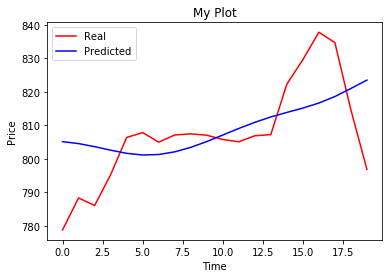

In [96]:
plt.plot(real_stock_price, '-r', label ='Real')
plt.plot(predicted_stock_price, '-b', label ='Predicted')
plt.title('My Plot')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [ ]:
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/